<center>

# Web Intelligence

# Who will win the Tennis Australian Open 2020?

## 01 Data Cleaning - Missing Values Filling

### Riccardo Spolaor (864877)

</center>

### Controllo e filling Missing Values
Controllo quali feature presentano valori mancanti e procedo al loro filling.

In [20]:
import pandas as pd

In [21]:
dataframe = pd.read_csv('./datasets/dataframe00.csv', low_memory = False)

In [22]:
dataframe.head()

,csvID,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,...,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
0,0,1.0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1.0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,1.0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,1.0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1.0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>


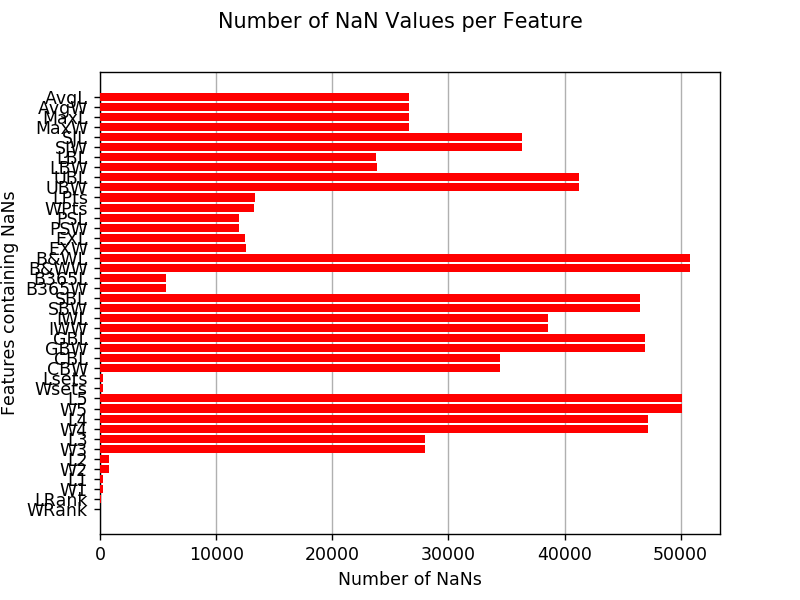

In [23]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

# Let's check how many missing values does each attribute have
def printNan():
    dictionary = {}
    for c in dataframe.columns:
        nan_sum = sum(dataframe[c].isna())
        if (nan_sum!=0): dictionary[c] = nan_sum
            
    if len(dictionary.keys()) != 0:
        shape = dataframe.shape[0]
        fig, ax = plt.subplots()
        ax.barh(np.arange(len(dictionary)), [v for k,v in dictionary.items()], zorder = 3, color = 'red')
        ax.set_yticks(np.arange(len(dictionary)))
        ax.set_yticklabels([k for k,v in dictionary.items()])
        fig.suptitle('Number of NaN Values per Feature')
        ax.set(xlabel = 'Number of NaNs', ylabel = 'Features containing NaNs')
        ax.xaxis.grid(zorder = 0)  
        fig.show()
    else:
        print('Nessun Valore Settato a NaN')
    
printNan()

Come prima cosa procedo a correggere le feature riguardanti le scommesse dei bookmaker.

Procedo riempiendo le feature ***AvgW*** e ***AvgL*** che presentano valori *NaN* rispettivamente con la media delle scommesse dei bookmaker per il vincitore e per il perdente.

Procedo riempiendo le feature ***MaxW*** e ***MaxL*** che presentano valori *NaN* rispettivamente con il massimo tra le scommesse dei bookmaker per il vincitore e per il perdente (considero pure ***AvgW*** e ***AvgL***).

Procedo riempiendo le feature ***AvgW***, ***AvgL***, ***MaxW*** e ***MaxL*** che presentano ancora valori *NaN* e che non avevano quindi scommesse singole dei bookmaker con la media dei valori delle rispettive colonne.

Inserisco le colonne ***AvgWAdded***, ***AvgLAdded***, ***MaxWAdded*** e ***MaxLAdded*** che presentano il valore 0 se il valore delle scommesse medie o massime era già presente o è stato calcolato con la media delle scommesse dei bookmaker per quel giocatore, e che presentano il valore 1 se il valore è stato calcolato con la media dei valori della colonna.

Infine elimino tutte le colonne del dataset riguardanti le scommesse dei singoli bookmaker.

In [24]:
# Calcolo AVG E E MAX DELLE PREDIZIONI DEI BOOKMAKER E FILLO CON VALORI MEDI CIO' CHE MANCA
dataframe.insert(dataframe.columns.get_loc('MaxW') + 1, column = 'MaxWAdded', value = 0)
dataframe.loc[dataframe['MaxW'].isna(), 'MaxWAdded'] = 1
dataframe.insert(dataframe.columns.get_loc('MaxL') + 1, column = 'MaxLAdded', value = 0)
dataframe.loc[dataframe['MaxL'].isna(), 'MaxLAdded'] = 1

odds_W = ['B365W','PSW', 'EXW', 'LBW', 'SJW', 'UBW', 'CBW', 'IWW', 'SBW', 'B&WW', 'GBW']
odds_L = ['B365L','PSL', 'EXL', 'LBL', 'SJL', 'UBL', 'CBL', 'IWL', 'SBL', 'B&WL', 'GBL']

print('Procedo al filling di AvgW e AvgL usando le altre predizioni dei bookmaker dove è possibile:')
print('AvgW settati a NaN prima: ',sum(dataframe['AvgW'].isna()))
print('AvgL settati a NaN prima: ',sum(dataframe['AvgL'].isna()))
dataframe['AvgW'].fillna(dataframe[odds_W].mean(axis=1), inplace = True)
dataframe['AvgL'].fillna(dataframe[odds_L].mean(axis=1), inplace= True)
print('AvgW settati a NaN dopo: ',sum(dataframe['AvgW'].isna()))
print('AvgL settati a NaN dopo: ',sum(dataframe['AvgL'].isna()), '\n')

print('Procedo al filling di MaxW e MaxL usando le altre predizioni dei bookmaker dove è possibile:')
print('MaxW settati a NaN prima: ',sum(dataframe['MaxW'].isna()))
print('MaxL settati a NaN prima: ',sum(dataframe['MaxL'].isna()))
dataframe['MaxW'].fillna(dataframe[odds_W + ['AvgW']].max(axis=1), inplace = True)
dataframe['MaxL'].fillna(dataframe[odds_L + ['AvgL']].max(axis=1), inplace= True)
print('MaxW settati a NaN dopo: ',sum(dataframe['MaxW'].isna()))
print('MaxL settati a NaN dopo: ',sum(dataframe['MaxL'].isna()), '\n')

print('Procedo al filling delle righe dove AvgW, AvgL e MaxW, MaxL hanno valori NaN tramite la media dei valori della colonna:')

dataframe.insert(dataframe.columns.get_loc('AvgW') + 1, column = 'AvgWAdded', value = 0)
dataframe.loc[dataframe['AvgW'].isna(), 'AvgWAdded'] = 1
dataframe.insert(dataframe.columns.get_loc('AvgL') + 1, column = 'AvgLAdded', value = 0)
dataframe.loc[dataframe['AvgL'].isna(), 'AvgLAdded'] = 1


dataframe['AvgW'].fillna(dataframe['AvgW'].mean(), inplace= True)
dataframe['AvgL'].fillna(dataframe['AvgL'].mean(), inplace= True)
dataframe['MaxW'].fillna(dataframe['MaxW'].mean(), inplace= True)
dataframe['MaxL'].fillna(dataframe['MaxL'].mean(), inplace= True)
dataframe.drop(odds_W + odds_L, axis = 1, inplace= True)

print(dataframe.columns)

dataframe = dataframe.reset_index(drop = True)

Procedo al filling di AvgW e AvgL usando le altre predizioni dei bookmaker dove è possibile:
AvgW settati a NaN prima:  26591
AvgL settati a NaN prima:  26591
AvgW settati a NaN dopo:  929
AvgL settati a NaN dopo:  929 

Procedo al filling di MaxW e MaxL usando le altre predizioni dei bookmaker dove è possibile:
MaxW settati a NaN prima:  26591
MaxL settati a NaN prima:  26591
MaxW settati a NaN dopo:  929
MaxL settati a NaN dopo:  929 

Procedo al filling delle righe dove AvgW, AvgL e MaxW, MaxL hanno valori NaN tramite la media dei valori della colonna:
Index(['csvID', 'ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court',
       'Surface', 'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank',
       'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets',
       'Lsets', 'Comment', 'WPts', 'LPts', 'MaxW', 'MaxWAdded', 'MaxL',
       'MaxLAdded', 'AvgW', 'AvgWAdded', 'AvgL', 'AvgLAdded'],
      dtype='object')


In [25]:
'''
dataframe.insert(dataframe.columns.get_loc('AvgW') + 1, column = 'AvgWAdded', value = 0)
dataframe.loc[dataframe['AvgW'].isna(), 'AvgWAdded'] = 1
dataframe.insert(dataframe.columns.get_loc('AvgL') + 1, column = 'AvgLAdded', value = 0)
dataframe.loc[dataframe['AvgL'].isna(), 'AvgLAdded'] = 1

dataframe.insert(dataframe.columns.get_loc('MaxW') + 1, column = 'MaxWAdded', value = 0)
dataframe.loc[dataframe['MaxW'].isna(), 'MaxWAdded'] = 1
dataframe.insert(dataframe.columns.get_loc('MaxL') + 1, column = 'MaxLAdded', value = 0)
dataframe.loc[dataframe['MaxL'].isna(), 'MaxLAdded'] = 1

odds_W = ['B365W','PSW', 'EXW', 'LBW', 'SJW', 'UBW', 'CBW', 'IWW', 'SBW', 'B&WW', 'GBW']
odds_L = ['B365L','PSL', 'EXL', 'LBL', 'SJL', 'UBL', 'CBL', 'IWL', 'SBL', 'B&WL', 'GBL']


print('Procedo eliminando le righe senza alcuna scommessa dei bookmaker:')

print('Righe prima dell\'eliminazione: ', dataframe.shape[0])
dataframe.dropna(subset = odds_W + ['AvgW'], axis=0, inplace= True, how = 'all')
dataframe.dropna(subset = odds_L + ['AvgL'], axis=0, inplace= True, how = 'all')
print('Righe dopo l\'eliminazione: ', dataframe.shape[0], '\n')

print('Procedo al filling di AvgW e AvgL:')
print('AvgW settati a NaN prima: ',sum(dataframe['AvgW'].isna()))
print('AvgL settati a NaN prima: ',sum(dataframe['AvgL'].isna()))
dataframe['AvgW'].fillna(dataframe[odds_W].mean(axis=1), inplace = True)
dataframe['AvgL'].fillna(dataframe[odds_L].mean(axis=1), inplace= True)
print('AvgW settati a NaN dopo: ',sum(dataframe['AvgW'].isna()))
print('AvgL settati a NaN dopo: ',sum(dataframe['AvgL'].isna()), '\n')

print('Procedo al filling di MaxW e MaxL:')
print('MaxW settati a NaN prima: ',sum(dataframe['MaxW'].isna()))
print('MaxL settati a NaN prima: ',sum(dataframe['MaxL'].isna()))
dataframe['MaxW'].fillna(dataframe[odds_W + ['AvgW']].max(axis=1), inplace = True)
dataframe['MaxL'].fillna(dataframe[odds_L + ['AvgL']].max(axis=1), inplace= True)
print('MaxW settati a NaN dopo: ',sum(dataframe['MaxW'].isna()))
print('MaxL settati a NaN dopo: ',sum(dataframe['MaxL'].isna()), '\n')

print('Creo le colonne MinW e MinL e droppo le scommesse singole dei bookmaker:')
dataframe['MinW'] = dataframe[odds_W + ['AvgW']].min(axis=1)
dataframe['MinL'] = dataframe[odds_L + ['AvgL']].min(axis=1)
dataframe.drop(odds_W + odds_L, axis = 1, inplace= True)

print(dataframe.columns)

dataframe = dataframe.reset_index(drop = True)
'''

"\ndataframe.insert(dataframe.columns.get_loc('AvgW') + 1, column = 'AvgWAdded', value = 0)\ndataframe.loc[dataframe['AvgW'].isna(), 'AvgWAdded'] = 1\ndataframe.insert(dataframe.columns.get_loc('AvgL') + 1, column = 'AvgLAdded', value = 0)\ndataframe.loc[dataframe['AvgL'].isna(), 'AvgLAdded'] = 1\n\ndataframe.insert(dataframe.columns.get_loc('MaxW') + 1, column = 'MaxWAdded', value = 0)\ndataframe.loc[dataframe['MaxW'].isna(), 'MaxWAdded'] = 1\ndataframe.insert(dataframe.columns.get_loc('MaxL') + 1, column = 'MaxLAdded', value = 0)\ndataframe.loc[dataframe['MaxL'].isna(), 'MaxLAdded'] = 1\n\nodds_W = ['B365W','PSW', 'EXW', 'LBW', 'SJW', 'UBW', 'CBW', 'IWW', 'SBW', 'B&WW', 'GBW']\nodds_L = ['B365L','PSL', 'EXL', 'LBL', 'SJL', 'UBL', 'CBL', 'IWL', 'SBL', 'B&WL', 'GBL']\n\n\nprint('Procedo eliminando le righe senza alcuna scommessa dei bookmaker:')\n\nprint('Righe prima dell'eliminazione: ', dataframe.shape[0])\ndataframe.dropna(subset = odds_W + ['AvgW'], axis=0, inplace= True, how = 'al

<IPython.core.display.Javascript object>


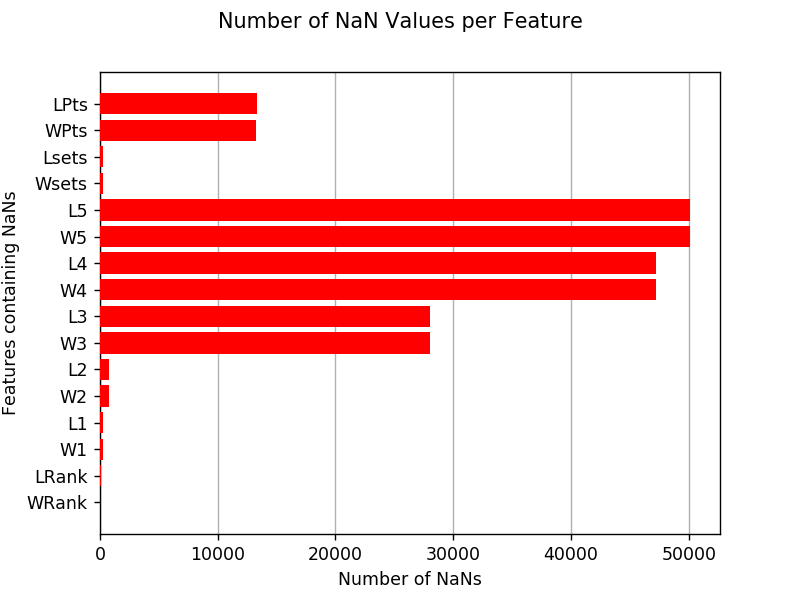

In [26]:
printNan()

Procedo a correggere le feature riguardanti il Rank dei giocatori (***WRank*** e ***LRank***).

Assegno ai valori del Ranking settati a *NaN* il valore  medio dei ranking (***WRank*** e ***LRank***) di quel giocatore, se questo valore non esiste elimino la riga.

Aggiungo le colonne ***WRankAdded*** e ***LRankAdded*** che assumono valori binari:
* 0 se il Rank era già presente;
* 1 se è stato inferito manualmente.

In [27]:
'''
def getMeanFeatureOfPlayer(player, value):
    rankList = dataframe[dataframe['Winner'] == player]['W'+value].append(
        dataframe[dataframe['Loser'] == player]['L'+value])
    return rankList.mean(skipna = True)

def getPlayersMeanFeature (value):
    players = dataframe['Winner'].append(dataframe['Loser']).unique()
    return {x : getMeanFeatureOfPlayer(x,value) for x in players}
    
def assignFeatureToPlayers(value):
    playersMeanRank = getPlayersMeanFeature (value)
    meanW = dataframe[dataframe['W'+value].isna()]['Winner'].apply(lambda x: playersMeanRank[x])
    meanL = dataframe[dataframe['L'+value].isna()]['Loser'].apply(lambda x: playersMeanRank[x])
    dataframe['W'+value].fillna(meanW, inplace = True)
    dataframe['L'+value].fillna(meanL, inplace = True)
'''

"\ndef getMeanFeatureOfPlayer(player, value):\n    rankList = dataframe[dataframe['Winner'] == player]['W'+value].append(\n        dataframe[dataframe['Loser'] == player]['L'+value])\n    return rankList.mean(skipna = True)\n\ndef getPlayersMeanFeature (value):\n    players = dataframe['Winner'].append(dataframe['Loser']).unique()\n    return {x : getMeanFeatureOfPlayer(x,value) for x in players}\n    \ndef assignFeatureToPlayers(value):\n    playersMeanRank = getPlayersMeanFeature (value)\n    meanW = dataframe[dataframe['W'+value].isna()]['Winner'].apply(lambda x: playersMeanRank[x])\n    meanL = dataframe[dataframe['L'+value].isna()]['Loser'].apply(lambda x: playersMeanRank[x])\n    dataframe['W'+value].fillna(meanW, inplace = True)\n    dataframe['L'+value].fillna(meanL, inplace = True)\n"

In [28]:
dataframe.insert(dataframe.columns.get_loc('WRank') + 1, column = 'WRankAdded', value = 0)
dataframe.loc[dataframe['WRank'].isna(), 'WRankAdded'] = 1
dataframe.insert(dataframe.columns.get_loc('LRank') + 1, column = 'LRankAdded', value = 0)
dataframe.loc[dataframe['LRank'].isna(), 'LRankAdded'] = 1

print('Filling di WRank e LRank:')

print('WRank settati a NaN prima: ',sum(dataframe['WRank'].isna()))
print('LRank settati a NaN prima: ',sum(dataframe['LRank'].isna()))

dataframe['WRank'].fillna(max(list(dataframe['WRank']) + list(dataframe['LRank']))+1, inplace = True)

dataframe['LRank'].fillna(max(list(dataframe['WRank']) + list(dataframe['LRank']))+1, inplace = True)

print('WRank settati a NaN dopo: ',sum(dataframe['WRank'].isna()))
print('LRank settati a NaN dopo: ',sum(dataframe['LRank'].isna()), '\n')

Filling di WRank e LRank:
WRank settati a NaN prima:  19
LRank settati a NaN prima:  108
WRank settati a NaN dopo:  0
LRank settati a NaN dopo:  0 



In [29]:
'''
dataframe.insert(dataframe.columns.get_loc('WRank') + 1, column = 'WRankAdded', value = 0)
dataframe.loc[dataframe['WRank'].isna(), 'WRankAdded'] = 1
dataframe.insert(dataframe.columns.get_loc('LRank') + 1, column = 'LRankAdded', value = 0)
dataframe.loc[dataframe['LRank'].isna(), 'LRankAdded'] = 1

print('Filling di WRank e LRank:')
print('WRank settati a NaN prima: ',sum(dataframe['WRank'].isna()))
print('LRank settati a NaN prima: ',sum(dataframe['LRank'].isna()))

assignFeatureToPlayers('Rank')

print('WRank settati a NaN dopo: ',sum(dataframe['WRank'].isna()))
print('LRank settati a NaN dopo: ',sum(dataframe['LRank'].isna()), '\n')

print('Dropping di righe  con WRank e LRank ancora settate a NaN:')
print('Righe prima dell\'eliminazione: ', dataframe.shape[0])

dataframe.dropna(subset = ['WRank'], axis=0, inplace= True)
dataframe.dropna(subset = ['LRank'], axis=0, inplace= True)

print('Righe dopo l\'eliminazione: ', dataframe.shape[0])

dataframe = dataframe.reset_index(drop = True)
'''

"\ndataframe.insert(dataframe.columns.get_loc('WRank') + 1, column = 'WRankAdded', value = 0)\ndataframe.loc[dataframe['WRank'].isna(), 'WRankAdded'] = 1\ndataframe.insert(dataframe.columns.get_loc('LRank') + 1, column = 'LRankAdded', value = 0)\ndataframe.loc[dataframe['LRank'].isna(), 'LRankAdded'] = 1\n\nprint('Filling di WRank e LRank:')\nprint('WRank settati a NaN prima: ',sum(dataframe['WRank'].isna()))\nprint('LRank settati a NaN prima: ',sum(dataframe['LRank'].isna()))\n\nassignFeatureToPlayers('Rank')\n\nprint('WRank settati a NaN dopo: ',sum(dataframe['WRank'].isna()))\nprint('LRank settati a NaN dopo: ',sum(dataframe['LRank'].isna()), '\n')\n\nprint('Dropping di righe  con WRank e LRank ancora settate a NaN:')\nprint('Righe prima dell'eliminazione: ', dataframe.shape[0])\n\ndataframe.dropna(subset = ['WRank'], axis=0, inplace= True)\ndataframe.dropna(subset = ['LRank'], axis=0, inplace= True)\n\nprint('Righe dopo l'eliminazione: ', dataframe.shape[0])\n\ndataframe = datafram

<IPython.core.display.Javascript object>


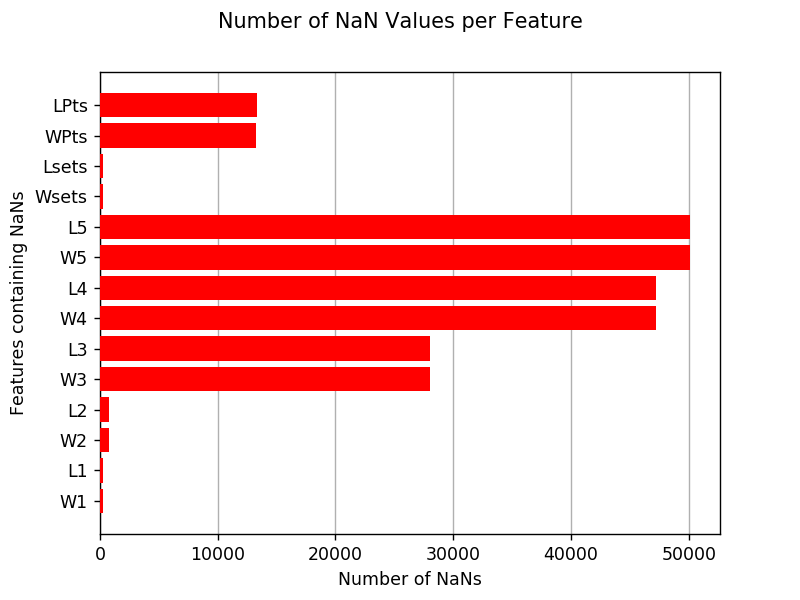

In [30]:
printNan()

Procedo a correggere le feature mancanti riguardanti i Punti dei giocatori (***WPts*** e ***LPts***) in modo analogo a quanto ho fatto per ***WRank*** e ***LRank***.

Aggiungo anche in questo caso le colonne ***WPtsAdded*** e ***LPtsAdded*** che assumono valori binari:

* 0 se i Punti erano già presenti;
* 1 se sono stati inferiti manualmente.


In [31]:
dataframe.insert(dataframe.columns.get_loc('WPts') + 1, column = 'WPtsAdded', value = 0)
dataframe.loc[dataframe['WPts'].isna(), 'WPtsAdded'] = 1
dataframe.insert(dataframe.columns.get_loc('LPts') + 1, column = 'LPtsAdded', value = 0)
dataframe.loc[dataframe['LPts'].isna(), 'LPtsAdded'] = 1

print('Filling di WPts e LPts:')
print('WPts settati a NaN prima: ',sum(dataframe['WPts'].isna()))
print('LPts settati a NaN prima: ',sum(dataframe['LPts'].isna()))

dataframe['WPts'].fillna(np.nanmin(list(dataframe['WPts']) + list(dataframe['LPts'])), inplace = True)
dataframe['LPts'].fillna(np.nanmin(list(dataframe['WPts']) + list(dataframe['LPts'])), inplace = True)

print('WPts settati a NaN dopo: ',sum(dataframe['WPts'].isna()))
print('LPts settati a NaN dopo: ',sum(dataframe['LPts'].isna()), '\n')

Filling di WPts e LPts:
WPts settati a NaN prima:  13244
LPts settati a NaN prima:  13313
WPts settati a NaN dopo:  0
LPts settati a NaN dopo:  0 



In [32]:
'''
dataframe.insert(dataframe.columns.get_loc('WPts') + 1, column = 'WPtsAdded', value = 0)
dataframe.loc[dataframe['WPts'].isna(), 'WPtsAdded'] = 1
dataframe.insert(dataframe.columns.get_loc('LPts') + 1, column = 'LPtsAdded', value = 0)
dataframe.loc[dataframe['LPts'].isna(), 'LPtsAdded'] = 1

print('Filling di WPts e LPts:')
print('WPts settati a NaN prima: ',sum(dataframe['WPts'].isna()))
print('LPts settati a NaN prima: ',sum(dataframe['LPts'].isna()))
            
assignFeatureToPlayers('Pts')

print('WPts settati a NaN dopo: ',sum(dataframe['WPts'].isna()))
print('LPts settati a NaN dopo: ',sum(dataframe['LPts'].isna()), '\n')

print('Dropping di righe  con WPts e LPts ancora settate a NaN:')
print('Righe prima dell\'eliminazione: ', dataframe.shape[0])

dataframe.dropna(subset = ['WPts'], axis=0, inplace= True)
dataframe.dropna(subset = ['LPts'], axis=0, inplace= True)

print('Righe dopo l\'eliminazione: ', dataframe.shape[0])

dataframe = dataframe.reset_index(drop = True)
'''

"\ndataframe.insert(dataframe.columns.get_loc('WPts') + 1, column = 'WPtsAdded', value = 0)\ndataframe.loc[dataframe['WPts'].isna(), 'WPtsAdded'] = 1\ndataframe.insert(dataframe.columns.get_loc('LPts') + 1, column = 'LPtsAdded', value = 0)\ndataframe.loc[dataframe['LPts'].isna(), 'LPtsAdded'] = 1\n\nprint('Filling di WPts e LPts:')\nprint('WPts settati a NaN prima: ',sum(dataframe['WPts'].isna()))\nprint('LPts settati a NaN prima: ',sum(dataframe['LPts'].isna()))\n            \nassignFeatureToPlayers('Pts')\n\nprint('WPts settati a NaN dopo: ',sum(dataframe['WPts'].isna()))\nprint('LPts settati a NaN dopo: ',sum(dataframe['LPts'].isna()), '\n')\n\nprint('Dropping di righe  con WPts e LPts ancora settate a NaN:')\nprint('Righe prima dell'eliminazione: ', dataframe.shape[0])\n\ndataframe.dropna(subset = ['WPts'], axis=0, inplace= True)\ndataframe.dropna(subset = ['LPts'], axis=0, inplace= True)\n\nprint('Righe dopo l'eliminazione: ', dataframe.shape[0])\n\ndataframe = dataframe.reset_ind

<IPython.core.display.Javascript object>


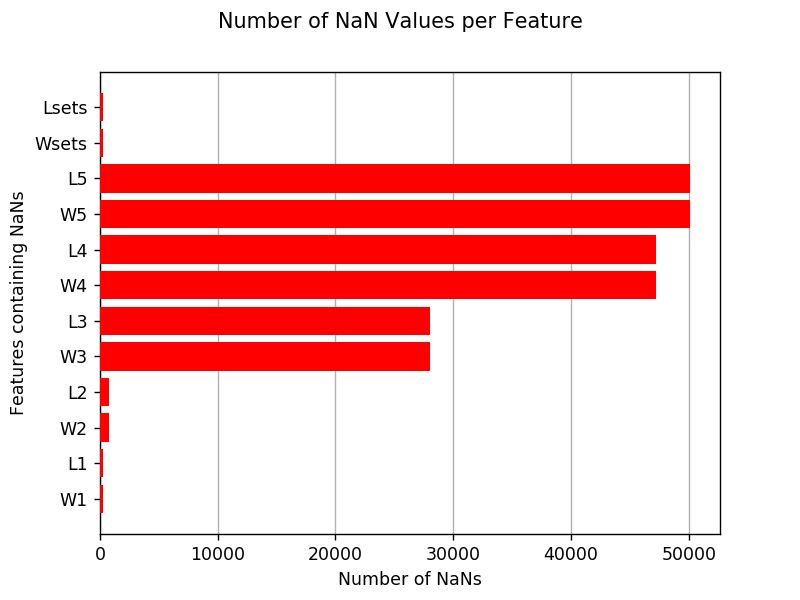

In [33]:
printNan()

Per quanto riguarda i valori *NaN* delle feature riguardanti i Set vinti dal vincitore e dal perdente (***Wsets*** e ***Lsets***) e i valori delle feature riguardanti i Punti per ogni Set dei due giocatori (***W1***, ***W2***, ***W3***, ***W4***, ***W5*** e ***L1***, ***L2***, ***L3***, ***L4***, ***L5***):
* Controllo solo i valori *NaN* di ***Wsets***, ***Lsets***, ***W1***, ***L1***, ***W2***, ***L2*** per tutte le partite e di ***W3***, ***L3*** solo per le partite al meglio di 5 (***Best Of*** = 5);
* Controllo solo le partite portate a termine (***Comment*** = *'Completed'*);
* Elimino le righe corrispondenti a questi match;
* Setto tutti i valori *NaN* rimanenti delle feature a 0.

In [34]:
'''
def dropCompletedNan (feature):
    if feature == 'sets':
        print ('\nCommenti delle partite in cui W'+feature, ' e L'+feature, ' è NULL o 0.\n')
        noDf = dataframe[dataframe['W'+feature].isna()].append(dataframe[dataframe['W'+feature] == 0]).drop_duplicates()
        noDf = noDf.append(dataframe[dataframe['L'+feature].isna()]).drop_duplicates()
    else:
        print ('\nCommenti delle partite in cui W'+feature, ' e L'+feature, ' è NULL.\n')
        noDf = dataframe[dataframe['W'+feature].isna()].append(dataframe[dataframe['L'+feature].isna()]).drop_duplicates()
        
    if feature == '3':
        print ('Consideriamo solo le partite al meglio di 5.\n')
        noDf = noDf[noDf['Best of'] == 5]
    
    print(noDf['Comment'].unique())
        
    if noDf[noDf['Comment'] == 'Completed'].shape[0] > 0:
        print ('\nControlliamo solo i casi in cui la partita è stata completata.\n')

        print(noDf[noDf['Comment'] == 'Completed'][['W1','W2','W3','W4','W5','L1','L2','L3','L4','L5',
                                                    'Wsets','Lsets', 'Best of']])

        print('\nScarto le righe incomplete.\n')

        print('Righe prima della modifica: ', dataframe.shape[0])

        dataframe.drop(noDf[noDf['Comment'] == 'Completed'].index.values, axis = 0, inplace = True)

        print('Righe dopo la modifica: ', dataframe.shape[0])
    else:
        print ('\nEsistono solo i casi in cui la partita non è stata completata, non scartiamo nessuna riga.\n')
        
    print('\n\n')
    '''

"\ndef dropCompletedNan (feature):\n    if feature == 'sets':\n        print ('\nCommenti delle partite in cui W'+feature, ' e L'+feature, ' è NULL o 0.\n')\n        noDf = dataframe[dataframe['W'+feature].isna()].append(dataframe[dataframe['W'+feature] == 0]).drop_duplicates()\n        noDf = noDf.append(dataframe[dataframe['L'+feature].isna()]).drop_duplicates()\n    else:\n        print ('\nCommenti delle partite in cui W'+feature, ' e L'+feature, ' è NULL.\n')\n        noDf = dataframe[dataframe['W'+feature].isna()].append(dataframe[dataframe['L'+feature].isna()]).drop_duplicates()\n        \n    if feature == '3':\n        print ('Consideriamo solo le partite al meglio di 5.\n')\n        noDf = noDf[noDf['Best of'] == 5]\n    \n    print(noDf['Comment'].unique())\n        \n    if noDf[noDf['Comment'] == 'Completed'].shape[0] > 0:\n        print ('\nControlliamo solo i casi in cui la partita è stata completata.\n')\n\n        print(noDf[noDf['Comment'] == 'Completed'][['W1','W2','

In [35]:
dataframe[dataframe['Wsets'].isna()]['Wsets'].fillna(2)
dataframe.fillna({'Wsets':0,'Lsets':0,'W1':0,'W2':0,'W3':0,'W4':0,'W5':0,'L1':0,'L2':0,'L3':0,'L4':0,'L5':0}, inplace = True)

In [36]:
'''
dropCompletedNan('sets')
dropCompletedNan('1')
dropCompletedNan('2')
dropCompletedNan('3')
dataframe.reset_index(drop = True, inplace = True)
'''

"\ndropCompletedNan('sets')\ndropCompletedNan('1')\ndropCompletedNan('2')\ndropCompletedNan('3')\ndataframe.reset_index(drop = True, inplace = True)\n"

In [37]:
#dataframe.loc[:,'W1':'Lsets'] = dataframe.loc[:,'W1':'Lsets'].fillna(0)

printNan()

Nessun Valore Settato a NaN


In [38]:
dataframe.to_csv('./datasets/dataframe01.csv', index = False)